In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def show_grid (matrix):
    size = len (matrix)
    unique_values = np.unique (matrix)
    if len (unique_values) <= 2:
        cmap = 'binary'
    else:
        cmap = ListedColormap (['lightblue', 'white', 'black'])
    board = np.array (matrix)
    fig, ax = plt.subplots (figsize = (16, 9))
    ax.imshow (board, cmap=cmap)
    ax.set_xticks (np.arange (-.5, size, 1))
    ax.set_yticks (np.arange (-.5, size, 1))
    ax.grid (color='black', linestyle='-', linewidth=1)
    ax.tick_params (axis='both', which='both', length=0)
    ax.set_xticklabels ([])
    ax.set_yticklabels ([])
    plt.show ()

In [40]:
def dfs (matrix, desti, destj):

    visited = [[False for j in range (len (matrix[0]))] for i in range (len (matrix))]
    path = list ()
    
    def helper (i, j):
        if min (i, j) < 0 or i >= len (matrix) or j >= len (matrix[0]) or matrix[i][j] == 1 or visited[i][j]:
            return False
        
        path.append ((i, j))
        visited[i][j] = True

        if (i == desti and j == destj):
            return True
        
        if helper (i - 1, j) or helper (i, j - 1) or helper (i + 1, j) or helper (i, j + 1):
            return True
        
        path.pop ()
        return False
        
    helper (0, 0)
    for i, j in path:
        matrix[i][j] = -1
    if visited[desti][destj]:
        show_grid (matrix)
    else:
        print ('Path to destination not possible!')

In [46]:
import numpy as np

matrix = None
def generate_maze(rows, cols):
    probs = [0.7, 0.3]
    maze = np.random.choice([0, 1], size=(rows, cols), p=probs)
    return maze
matrix = generate_maze(10, 10)
matrix

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 1, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0, 0, 0, 1],
       [0, 0, 1, 1, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

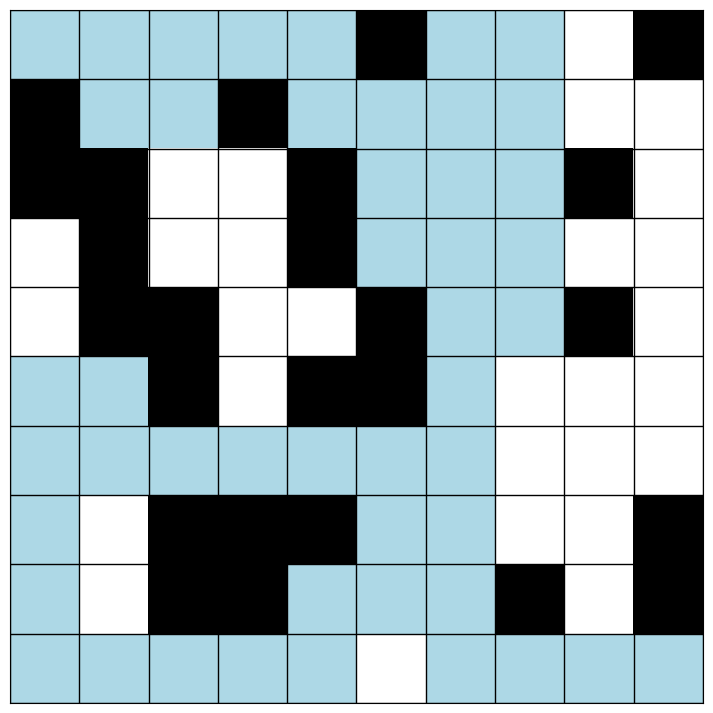

In [47]:
dfs (matrix, 9, 9)